In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
df = pd.read_csv('top10s.csv', encoding='latin-1')
print(df.shape)
print(df.head())

(603, 15)
   Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78  


In [27]:
# remover colunas que não serão usadas na classificação
df = df.drop(columns=['Unnamed: 0', 'title', 'artist', 'year'])

df.head()

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,neo mellow,97,89,67,-4,8,80,217,19,4,83
1,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2,dance pop,120,84,76,-3,29,71,200,10,14,80
3,dance pop,119,92,70,-4,8,71,295,0,4,79
4,pop,109,84,64,-5,9,43,221,2,4,78


In [28]:
# move a coluna 'top genre' para o final do dataframe, pois será o atributo classificador
df['top genre'] = df.pop('top genre')

In [29]:
X = df.iloc[:, 0:9] # colunas de 0 a 10 referem-se aos atributos preditores

y = df.iloc[:, 9] # coluna 10, referente a "genre" (atributo calssificador)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [32]:
#substituir valores class por um numero. Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

#df['class.1'] = df['class.1'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#df.head(100)

In [33]:
#Classificador KNN
k = 15
algoritmo = KNeighborsClassifier(n_neighbors = k)
algoritmo.fit(X_treino, y_treino)
previsoes = algoritmo.predict(X_teste)
previsoes

array([72, 80, 69, 50, 78, 52, 77, 75, 70, 34, 73, 72,  0, 78, 45, 57, 71,
       77, 69, 62, 78, 63, 62, 67, 80, 67, 67, 73, 66, 72, 77, 64, 70, 52,
       72, 70, 65, 70, 71, 66, 52, 52, 61, 64, 63, 65, 73, 61, 52,  0, 72,
       57, 52, 57, 76, 79, 52, 52, 61, 70, 73, 69, 73, 46, 70, 76, 77, 71,
       67, 77, 71, 72, 52, 67, 76, 52, 73, 36, 72, 52, 73, 61, 57, 78, 52,
       75, 70, 52, 73, 69, 61, 33, 73, 52, 52, 76, 64, 58, 72, 78, 61, 73,
       28, 66, 77, 45, 69, 73, 52, 70, 33, 77, 71, 72, 64, 75, 77, 81, 69,
       77, 78, 78, 52, 72, 65, 74, 52, 78, 52, 71, 38, 81, 51, 53, 59, 73,
       69, 68, 75, 74, 71, 57, 73, 76, 69, 57, 62, 76, 78, 61, 78, 71, 72,
       73, 67, 76, 52, 53, 52, 52, 18, 77, 65, 63, 65, 72, 52, 75, 72, 57,
       73, 77, 69, 76, 61, 70, 65, 54, 76, 63, 52])

In [34]:
#Matriz de Confusão e validação da classificação

#                       classificação_real, classificação prevista
matriz_confusao = confusion_matrix(y_teste, previsoes)

acuracia = accuracy_score(y_teste, previsoes)

print(matriz_confusao)
print(acuracia)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.011049723756906077


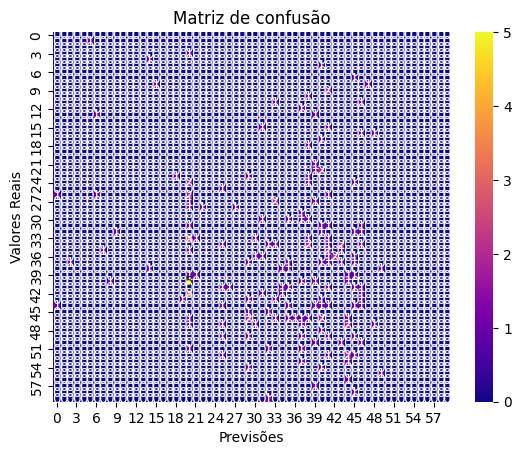

In [35]:
sns.heatmap(matriz_confusao, annot = True, fmt='d', cmap = 'plasma')
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")

plt.title("Matriz de confusão")
plt.show()

In [36]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         2
          47       0.00      0.00      0.00         2
          49       0.00    

c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(